### Homework 2: Machine Learning for Regression

In [1]:
import pandas as pd
import numpy as np

#### Dataset

In [2]:
# Get the dataset url

data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [3]:
!wget $data

--2025-10-08 10:43:50--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.5’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.005s  

2025-10-08 10:43:50 (154 MB/s) - ‘car_fuel_efficiency.csv.5’ saved [874188/874188]



In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [5]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [6]:
# use only selected columns

cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']

In [7]:
df[cols].head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [8]:
df = df[cols]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


#### EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

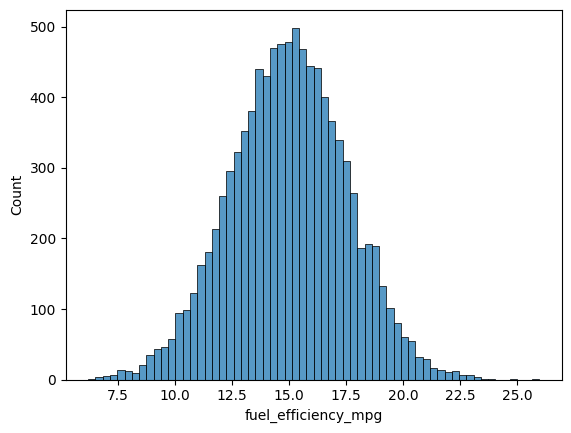

In [10]:
# Look at fuel_efficiency_mpg variable.  Does it have a long tail?  No, it does not have a long tail.

sns.histplot(df.fuel_efficiency_mpg)

In [11]:
# Question 1: There is one column with missing values.  Which is it? horsepower

df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [12]:
# Question 2: What is the median for variable 'horsepower'?

df.horsepower.median()

np.float64(149.0)

#### Prepare and split the dataset

In [13]:
# Shuffle the filtered dataset. Use seed 42.
# Split the data in train/val/test sets, with 60%/20%/20% distribution.

In [14]:
idx = np.arange( len(df) )

In [15]:
np.random.seed(42)
np.random.shuffle(idx)

In [16]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test
n_val, n_test, n_train, n

(1940, 1940, 5824, 9704)

In [17]:
df_train = df.iloc[ idx[:n_train] ]
df_val = df.iloc[ idx[n_train:n_train+n_val] ]
df_test = df.iloc[ idx[n_train+n_val:] ]

In [18]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [19]:
# check the lengths of the subsets
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [20]:
# reset indices of the subsets

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [22]:
# Extract the y vectors from the dfs

y_train = np.array( df_train.fuel_efficiency_mpg.values )
y_val = np.array( df_val.fuel_efficiency_mpg.values )
y_test = np.array( df_test.fuel_efficiency_mpg.values )

In [23]:
# Drop the fuel_efficiency_mpg columns from the dfs

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [24]:
# Check lengths of y vectors

len(y_train), len(y_val), len(y_test)

(5824, 1940, 1940)

#### Question 3

In [25]:
# We have 2 options for dealing with missing values for 'horsepower' column:
# fill it with 0, or with mean of the variable.
# Try both options.  For each, train a linear regression model without regularization using code from lessons.
# Use validation dataset to evaluate the models and compare the RMSE of the models.
# Round the RMSE scores to 2 dec digits using round(score, 2).
# Which option gives better RMSE?

In [26]:
# prepare the X matrix for the df, including using the specified fillna value for missing data

def prepare_X(df, fillna_val=0):
    df = df.copy()

    df = df.fillna(fillna_val)
    X = df.values

    return X

In [27]:
# Linear regression function

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack( [ones, X] )

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [28]:
# Calculate the RMSE

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [29]:
# Linear regression model, filling missing values with 0

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
round( rmse(y_val, y_pred), 2)

np.float64(0.52)

In [30]:
# Find mean of horsepower column in df_train

df_train.horsepower.mean()

np.float64(149.54476367006487)

In [31]:
# Linear regression model, filling missing values with 0

X_train = prepare_X(df_train, df_train.horsepower.mean())
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
round( rmse(y_val, y_pred), 2)

np.float64(0.61)

In [32]:
# Question 3
# From the above results:
# rmse for option where fillna value is 0 = 0.52
# rmse for option where fillna value is mean = 0.61
# Therefore, rmse with 0 gives better rmse.

#### Question 4

In [33]:
# We'll train a regularized linear regression.
# Fill the NAs with 0.
# Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100 ].
# Use RMSE to evaluate the model on the validation dataset.
# Round the RMSE scores to 2 decimal digits.
# Which r gives the best RMSE?
# If multiple options give the same best RMSE, select the smallest r.

In [34]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones( X.shape[0] )
    X = np.column_stack( [ones, X] )

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye( XTX.shape[0] )

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [35]:
# Loop through the different r values from the list.

X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

r_vals = [0, 0.01, 0.1, 1, 5, 10, 100 ]

for r in r_vals:
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w0 + X_val.dot(w)
    score = round( rmse(y_val, y_pred), 2)
    print( f"r={r}\trmse={score}")

r=0	rmse=0.52
r=0.01	rmse=0.52
r=0.1	rmse=0.52
r=1	rmse=0.52
r=5	rmse=0.52
r=10	rmse=0.52
r=100	rmse=0.52


In [36]:
# Question 4 results
# Since rmse scores are the same for all values of r, we select the smallest r, i.e. r=0.

#### Question 5

In [37]:
# We want to find out how selecting the seed influences our score.
# Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
# For each seed, do the train/validation/test split with 60%/20%/20% distribution.
# Fill the missing values with 0 and train a model without regularization.
# For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
# Round the result to 3 decimal digits. ( round(std, 3) )

In [38]:
def data_split(df, seed):
    idx = np.arange( len(df) )

    np.random.seed(seed)
    np.random.shuffle(idx)

    n = len(df)

    n_val = int(n*0.2)
    n_test = int(n*0.2)
    n_train = n - n_val - n_test

    df_train = df.iloc[ idx[:n_train] ]
    df_val = df.iloc[ idx[n_train:n_train+n_val] ]
    df_test = df.iloc[ idx[n_train+n_val:] ]

    y_train = np.array( df_train.fuel_efficiency_mpg.values )
    y_val = np.array( df_val.fuel_efficiency_mpg.values )
    y_test = np.array( df_test.fuel_efficiency_mpg.values )

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    return df_train, y_train, df_val, y_val, df_test, y_test

In [39]:
# Loop through the values of seed

seed_vals = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
results = {}

for seed in seed_vals:
    df_train, y_train, df_val, y_val, df_test, y_test = data_split(df, seed)
    
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = round( rmse(y_val, y_pred), 3)

    results[seed] = score

    print(f"seed={seed}\trmse={score}")

seed=0	rmse=0.521
seed=1	rmse=0.521
seed=2	rmse=0.523
seed=3	rmse=0.516
seed=4	rmse=0.511
seed=5	rmse=0.528
seed=6	rmse=0.531
seed=7	rmse=0.509
seed=8	rmse=0.515
seed=9	rmse=0.513


In [40]:
round( np.std( list(results.values()) ), 4)

np.float64(0.0069)

#### Question 6

In [41]:
# Split the dataset like previously, use seed 9.
# Combine train and validation datasets.
# Fill the missing values with 0 and train a model with r=0.001.
# What is the RMSE on the test dataset?

seed = 9
df_train, y_train, df_val, y_val, df_test, y_test = data_split(df, seed)

# combine train and validation datasets
df_combo_train = pd.concat( [df_train, df_val] )
df_combo_train = df_combo_train.reset_index(drop=True)


In [42]:
X_combo_train = prepare_X(df_combo_train)

In [43]:
X_combo_train

array([[ 240.        ,  136.        , 4050.51228957, 2006.        ],
       [ 190.        ,  141.        , 3195.86694158, 2017.        ],
       [ 200.        ,  184.        , 3006.16436968, 2017.        ],
       ...,
       [ 180.        ,  154.        , 3346.96567067, 2018.        ],
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 260.        ,  174.        , 2702.25730066, 2011.        ]],
      shape=(7764, 4))

In [44]:
# Combine the y values
y_combo_train = np.concatenate( [y_train, y_val] )

In [45]:
y_combo_train

array([10.30469994, 13.47943378, 16.19065297, ..., 13.67814034,
       17.59323665, 16.06897494], shape=(7764,))

In [46]:
# Train a model with r=0.001
w0, w = train_linear_regression_reg( X_combo_train, y_combo_train, 0.001)

In [47]:
# Get the RMSE of the model on the test dataset

X_test = prepare_X( df_test )
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.5156261299169602)